In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

import explore as ex

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('prepped_data.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

age gender          race        date         city state  zipcode     county  \
0  24   Male  Unknown Race  2021-05-09    Leicester    MA   1524.0  Worcester   
1  52   Male  Unknown Race  2021-05-07     Rutledge    TN  37861.0   Grainger   
2  47   Male         White  2021-05-06  San Andreas    CA  95249.0  Calaveras   
3  49   Male         White  2021-05-05    Las Vegas    NV  89104.0      Clark   
4  30   Male         Black  2021-05-03       Biloxi    MS  39532.0   Harrison   

                                  agency_responsible cause_of_death  ...  \
0                        Leicester Police Department        gunshot  ...   
1  Bean Station Police Department, Rutledge Polic...        gunshot  ...   
2                  Calaveras County Sheriff's Office        gunshot  ...   
3           Las Vegas Metropolitan Police Department        gunshot  ...   
4                           Biloxi Police Department        gunshot  ...   

  mental_illness armed_unarmed_status alleged_weapon alleged_threat_lvl  \
0             no      Allegedly Armed            gun             attack   
1             no      Allegedly Armed            gun             attack   
2             no      Allegedly Armed            gun              other   
3             no      Allegedly Armed            gun             attack   
4             no      Allegedly Armed            gun              other   

       fleeing body_camera geography  encounter_type_draft  \
0  not fleeing          no  Suburban                 other   
1  not fleeing          no     Rural  part 1 violent crime   
2  not fleeing          no     Rural  part 1 violent crime   
3  not fleeing          no     Urban  part 1 violent crime   
4          car          no  Suburban  part 1 violent crime   

  initial_reported_reason_for_encounter_draft  \
0                        deliberate car crash   
1                                    shooting   
2                           hostage situation   
3                                    shooting   
4                                    shooting   

  known_past_shootings_of_Officer_draft  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
4                                     0  

[5 rows x 23 columns]

# Is the body camera and alleged threat level indepentent of one another?

## Hypothesis:
- There is a dependency between body camera and alleged threat level. 

### Prior to making visualizations target and feature need to be converted to binary

In [ ]:
df.body_camera = np.where(df['body_camera'].str.lower().str.contains('video'), "yes", df.body_camera)
df.body_camera = df.body_camera.replace('yes', 1).replace('no', 0)

In [ ]:
df.body_camera.value_counts(dropna=False)

0    5961
1     663
Name: body_camera, dtype: int64

In [ ]:
df.alleged_threat_lvl = df.alleged_threat_lvl.str.lower().replace('undetermined', np.nan).replace('none', np.nan).replace('attack', 1).replace('other', 0)

In [ ]:
df.alleged_threat_lvl.value_counts()

1.0    4248
0.0    2026
Name: alleged_threat_lvl, dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
train, validate, test = ex.split(df, stratify_by=None)

## Create pandas crosstab to see counts of different groups within body_cam and alleged threat

In [ ]:
pd.crosstab(train.body_camera, train.alleged_threat_lvl)

alleged_threat_lvl  0.0   1.0
body_camera                  
0                   980  2184
1                   139   210

### Body cam as x-axis using count(body_cam) as y-axis and alleged_threat as the hue

alt.Chart(...)

### Alleged threat as x-axis using count(alleged threat) as y-axis and body_cam as the hue

alt.Chart(...)

In [ ]:
ex.chi2(train, 'body_camera', 'alleged_threat_lvl', alpha=0.05)

Observed

[[ 980 2184]
 [ 139  210]]
---
Expected

[[1007.83262169 2156.16737831]
 [ 111.16737831  237.83262169]]
---

chi^2 = 10.9492
p     = 0.0009

Because the p-value: 0.0009 is less than alpha: 0.05, we can reject the null hypothesis


P-value is less than alpha, allowing us to reject the null hypothesis, indicating a dependancy. We move forward with the alternate hypothesis

## What is the probability of an attack while a body cam is being used? 

#### Normalized by 'index'

In [ ]:
pd.crosstab(train.body_camera, train.alleged_threat_lvl, normalize ='index')

alleged_threat_lvl       0.0       1.0
body_camera                           
0                   0.309735  0.690265
1                   0.398281  0.601719

<AxesSubplot:xlabel='body_camera'>

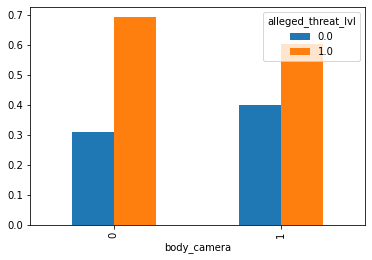

In [ ]:
pd.crosstab(train.body_camera, train.alleged_threat_lvl, normalize ='index').plot(kind= 'bar')

#### Normalize by 'index' take aways
- While using a body cam, 60% are alleged attack
- While NOT using a body cam 69% are alleged attacks an increase of 9%

In [ ]:
pd.crosstab(train.body_camera, train.alleged_threat_lvl, normalize= True)

alleged_threat_lvl       0.0       1.0
body_camera                           
0                   0.278964  0.621691
1                   0.039567  0.059778

<AxesSubplot:xlabel='body_camera'>

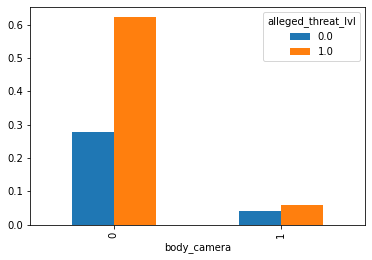

In [ ]:
pd.crosstab(train.body_camera, train.alleged_threat_lvl, normalize= True).plot(kind= 'bar')

#### Fully normalized
- 68% of all records are alleged attacks
- 62% of all records are alleged attacks with no body cam
- 6% of all records are alleged attacks with a body cam

In [ ]:
pd.crosstab(train.body_camera, train.alleged_threat_lvl, normalize= 'columns')

alleged_threat_lvl       0.0       1.0
body_camera                           
0                   0.875782  0.912281
1                   0.124218  0.087719

<AxesSubplot:xlabel='body_camera'>

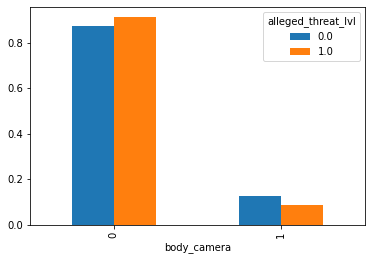

In [ ]:
pd.crosstab(train.body_camera, train.alleged_threat_lvl, normalize= 'columns').plot(kind= 'bar')

#### 91% of all attacks are to officers without a body cam

In [ ]:
train.head(2)

age gender          race        date           city state  zipcode  \
109   Unknown   Male  Unknown Race  2021-03-24        Phoenix    AZ  85034.0   
4008       46   Male         White  2017-07-04  West Richland    WA  99353.0   

        county              agency_responsible cause_of_death  ...  \
109   Maricopa           U.S. Marshals Service        gunshot  ...   
4008    Benton  Benton County Sheriff's Office        gunshot  ...   

     mental_illness armed_unarmed_status alleged_weapon alleged_threat_lvl  \
109              no      Allegedly Armed          knife                0.0   
4008             no      Allegedly Armed            gun                0.0   

          fleeing body_camera  geography  encounter_type_draft  \
109           car           0      Urban                 other   
4008  not fleeing           0   Suburban  domestic disturbance   

      initial_reported_reason_for_encounter_draft  \
109                                         theft   
4008                         domestic disturbance   

     known_past_shootings_of_Officer_draft  
109                                      0  
4008                                     0  

[2 rows x 23 columns]

In [ ]:
df.official_disposition = df.official_disposition.str.lower()
df.official_disposition = np.where(df['official_disposition'].str.contains('pending'), "pending investigation", df.official_disposition)

In [ ]:
df.official_disposition = np.where(df['official_disposition'].str.contains('charged'), "charged", df.official_disposition)

In [ ]:
df.official_disposition = np.where(df['official_disposition'].str.contains('justified'), "justified", df.official_disposition)

In [ ]:
df.official_disposition.value_counts(dropna=False)

pending investigation                                           5105
justified                                                        648
unreported                                                       285
grand jury/no bill or cleared                                    109
charged                                                           77
murder/suicide                                                    14
under investigation                                               12
unknown                                                            6
civil suit/family awarded money                                    6
administrative discipline                                          4
cleared                                                            3
administrative discipline/civil suit/family awarded money          2
ruled accidental                                                   1
cleared by coroner's inquest/civil suit/family awarded money       1
murder / suicide                  

In [ ]:
df[(df.body_camera == 1) & (df.official_disposition == 'charged')]

age  gender             race        date              city state  \
357   47    Male            Black  2020-12-22          Columbus    OH   
546   31    Male            Black  2020-10-03        Wolfe City    TX   
906   46    Male            Black  2020-05-25       Minneapolis    MN   
991   36    Male            White  2020-05-01         San Diego    CA   
1031  25    Male            Black  2020-04-19         Milwaukee    WI   
1036  33    Male            Black  2020-04-18       San Leandro    CA   
1081  44    Male            Black  2020-04-06        Shreveport    LA   
1203  40    Male         Hispanic  2020-02-29        Las Cruces    NM   
1628  28  Female            Black  2019-10-12        Fort Worth    TX   
1964  35    Male         Hispanic  2019-06-12            Dallas    TX   
2006  26    Male            Asian  2019-05-31            Auburn    WA   
2040  34  Female            White  2019-05-20         Blackwell    OK   
2173  25    Male            White  2019-03-27            Burnet    TX   
2330  46    Male            Black  2019-01-28            Newark    NJ   
2734  24    Male            Black  2018-09-01         Arlington    TX   
2841  25    Male            Black  2018-07-26         Nashville    TN   
2938  33    Male            Black  2018-06-20         Kingsland    GA   
3048  32    Male         Hispanic  2018-05-07           Orlando    FL   
3561  42    Male            Black  2017-12-01     San Francisco    CA   
3604  29    Male  Native American  2017-11-15     Oklahoma City    OK   
4080  32    Male            Black  2017-06-08      Philadelphia    PA   
4205  15    Male            Black  2017-04-29     Balch Springs    TX   
4366  46  Female            White  2017-02-26             Ripon    CA   
4515  21  Female         Hispanic  2017-01-18            Dallas    TX   
4960  23    Male            Black  2016-08-13         Milwaukee    WI   
5462  26    Male         Hispanic  2016-02-24           Norwalk    CA   
5592  26    Male            White  2016-01-17              Mesa    AZ   
5734  26    Male            White  2015-11-26          Paradise    CA   
5794   6    Male            White  2015-11-03        Marksville    LA   
6084  43    Male            Black  2015-07-19        Cincinnati    OH   
6122  62    Male            White  2015-07-08          Crumpler    NC   
6365  50    Male            Black  2015-04-04  North Charleston    SC   

      zipcode         county                          agency_responsible  \
357   43221.0       Franklin                 Columbus Division of Police   
546   75496.0           Hunt                Wolfe City Police Department   
906   55407.0       Hennepin               Minneapolis Police Department   
991   92101.0      San Diego           San Diego County Sheriff's Office   
1031  53219.0      Milwaukee                 Milwaukee Police Department   
1036  94579.0        Alameda               San Leandro Police Department   
1081  71109.0          Caddo                Shreveport Police Department   
1203  88005.0       Dona Ana                Las Cruces Police Department   
1628  76104.0        Tarrant                Fort Worth Police Department   
1964  75229.0         Dallas           Farmer's Branch Police Department   
2006  98002.0           King                    Auburn Police Department   
2040  74631.0            Kay                 Blackwell Police Department   
2173  78611.0         Burnet                    Burnet Police Department   
2330   7103.0          Essex                    Newark Police Department   
2734  76015.0        Tarrant                 Arlington Police Department   
2841  37203.0       Davidson    Metropolitan Nashville Police Department   
2938  31548.0         Camden                 Kingsland Police Department   
3048  32803.0         Orange                   Orlando Police Department   
3561  94124.0  San Francisco             San Francisco Police Department   
3604  73108.0       Oklahoma             Oklahoma City Police Department   

#### Body cam charged more? convicted?
- In this dataset, th ere are 77 officers that were charged for with a crime
- 32 of them were wearing a body cam

### Attacks with body cam charged? convicted?

In [ ]:
df[(df.body_camera == 1) & (df.alleged_threat_lvl == 1) & (df.official_disposition == 'charged')]

age  gender      race        date       city state  zipcode       county  \
2040  34  Female     White  2019-05-20  Blackwell    OK  74631.0          Kay   
2173  25    Male     White  2019-03-27     Burnet    TX  78611.0       Burnet   
2734  24    Male     Black  2018-09-01  Arlington    TX  76015.0      Tarrant   
2938  33    Male     Black  2018-06-20  Kingsland    GA  31548.0       Camden   
3048  32    Male  Hispanic  2018-05-07    Orlando    FL  32803.0       Orange   
5462  26    Male  Hispanic  2016-02-24    Norwalk    CA  90650.0  Los Angeles   
6122  62    Male     White  2015-07-08   Crumpler    NC  28617.0         Ashe   

                           agency_responsible cause_of_death  ...  \
2040              Blackwell Police Department        gunshot  ...   
2173                 Burnet Police Department        gunshot  ...   
2734              Arlington Police Department        gunshot  ...   
2938              Kingsland Police Department        gunshot  ...   
3048                Orlando Police Department        gunshot  ...   
5462  Los Angeles County Sheriff's Department        gunshot  ...   
6122             Ashe County Sheriff's Office        gunshot  ...   

           mental_illness                armed_unarmed_status alleged_weapon  \
2040                   no                     Allegedly Armed            gun   
2173                   no                             Vehicle        vehicle   
2734                   no                             Vehicle        vehicle   
2938                   no  Unarmed/Did Not Have Actual Weapon      no object   
3048                   no                             Vehicle        vehicle   
5462                   no                             Vehicle        vehicle   
6122  drug or alcohol use                             Vehicle        vehicle   

     alleged_threat_lvl      fleeing body_camera  geography  \
2040                1.0          car           1      Rural   
2173                1.0  not fleeing           1      Rural   
2734                1.0          car           1      Urban   
2938                1.0         foot           1   Suburban   
3048                1.0          car           1   Suburban   
5462                1.0  not fleeing           1      Urban   
6122                1.0          car           1      Rural   

      encounter_type_draft  initial_reported_reason_for_encounter_draft  \
2040  part 1 violent crime                                     shooting   
2173                 other                disturbance - noise complaint   
2734          traffic stop                            traffic violation   
2938          none/unknown                                         none   
3048                 other                                  shoplifting   
5462  part 1 violent crime                            traffic violation   
6122  part 1 violent crime                            traffic violation   

     known_past_shootings_of_Officer_draft  
2040                                     0  
2173                                     0  
2734                                     0  
2938                                     0  
3048                                     0  
5462                                     0  
6122                                     0  

[7 rows x 23 columns]

7 police charged with a crime during an attack while wearing a body cam

In [ ]:
df.head()

age gender          race        date         city state  zipcode     county  \
0  24   Male  Unknown Race  2021-05-09    Leicester    MA   1524.0  Worcester   
1  52   Male  Unknown Race  2021-05-07     Rutledge    TN  37861.0   Grainger   
2  47   Male         White  2021-05-06  San Andreas    CA  95249.0  Calaveras   
3  49   Male         White  2021-05-05    Las Vegas    NV  89104.0      Clark   
4  30   Male         Black  2021-05-03       Biloxi    MS  39532.0   Harrison   

                                  agency_responsible cause_of_death  ...  \
0                        Leicester Police Department        gunshot  ...   
1  Bean Station Police Department, Rutledge Polic...        gunshot  ...   
2                  Calaveras County Sheriff's Office        gunshot  ...   
3           Las Vegas Metropolitan Police Department        gunshot  ...   
4                           Biloxi Police Department        gunshot  ...   

  mental_illness armed_unarmed_status alleged_weapon alleged_threat_lvl  \
0             no      Allegedly Armed            gun                1.0   
1             no      Allegedly Armed            gun                1.0   
2             no      Allegedly Armed            gun                0.0   
3             no      Allegedly Armed            gun                1.0   
4             no      Allegedly Armed            gun                0.0   

       fleeing body_camera  geography  encounter_type_draft  \
0  not fleeing           0   Suburban                 other   
1  not fleeing           0      Rural  part 1 violent crime   
2  not fleeing           0      Rural  part 1 violent crime   
3  not fleeing           0      Urban  part 1 violent crime   
4          car           0   Suburban  part 1 violent crime   

   initial_reported_reason_for_encounter_draft  \
0                         deliberate car crash   
1                                     shooting   
2                            hostage situation   
3                                     shooting   
4                                     shooting   

  known_past_shootings_of_Officer_draft  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
4                                     0  

[5 rows x 23 columns]

In [ ]:
df.armed_unarmed_status.value_counts()

Allegedly Armed                       4838
Unarmed/Did Not Have Actual Weapon     679
Vehicle                                431
Unclear                                305
Allegedly armed                         21
Name: armed_unarmed_status, dtype: int64

In [ ]:
df.encounter_type_draft.value_counts()

part 1 violent crime           3187
other                          1009
domestic disturbance            580
traffic stop                    468
mental health/welfare check     433
none/unknown                    299
person with a weapon            298
Name: encounter_type_draft, dtype: int64

In [ ]:
df.fleeing = np.where(df['fleeing'].str.contains('car'), "fleeing", df.fleeing)
df.fleeing = np.where(df['fleeing'].str.contains('foot'), "fleeing", df.fleeing)
df.fleeing = np.where(df['fleeing'].str.contains('other'), "not fleeing", df.fleeing)

flee_dummies = pd.get_dummies(df.fleeing, prefix='is')
flee_dummies.drop(columns='is_not fleeing', inplace=True)

In [ ]:
df.fleeing.value_counts()

not fleeing    4565
fleeing        1709
Name: fleeing, dtype: int64

In [ ]:
flee_dummies = pd.get_dummies(df.fleeing, prefix='was')
flee_dummies.drop(columns='was_not fleeing', inplace=True)

- Allegedly Armed                       4838
- Unarmed/Did Not Have Actual Weapon     679
- Vehicle                                431
- Unclear                                305
- Allegedly armed                         21

In [ ]:
df.armed_unarmed_status = df.armed_unarmed_status.str.lower().str.strip().str.replace(' ', '_').replace('unarmed/did_not_have_actual_weapon', 'unarmed')
df.armed_unarmed_status.value_counts()

allegedly_armed    4859
unarmed             679
vehicle             431
unclear             305
Name: armed_unarmed_status, dtype: int64

In [ ]:
armed_dummies = pd.get_dummies(df.armed_unarmed_status, prefix='was').drop(columns='was_unclear')

- part 1 violent crime           3187
- other                          1009
- domestic disturbance            580
- traffic stop                    468
- mental health/welfare check     433
- none/unknown                    299
- person with a weapon            298

In [ ]:
df.encounter_type_draft = np.where(df['encounter_type_draft'].str.contains('none'), "other", df.encounter_type_draft)
df.encounter_type_draft = np.where(df['encounter_type_draft'].str.contains('part 1'), "violent crime_part 1", df.encounter_type_draft)
df.encounter_type_draft = df.encounter_type_draft.str.replace(' ', '_').str.replace('/', '_')
df.encounter_type_draft.value_counts()

violent_crime_part_1           3187
other                          1308
domestic_disturbance            580
traffic_stop                    468
mental_health_welfare_check     433
person_with_a_weapon            298
Name: encounter_type_draft, dtype: int64

In [ ]:
encounter_dummies = pd.get_dummies(df.encounter_type_draft, prefix='was').drop(columns='was_other')

In [ ]:
df.age

0       24
1       52
2       47
3       49
4       30
        ..
6619    20
6620    21
6621    38
6622    38
6623    51
Name: age, Length: 6274, dtype: object

In [ ]:
df['age'] = np.where(df['age'].str.contains('s'), '', df.age)
df['number_age'] = pd.to_numeric(np.where(df['age'].str.contains('Unknown'), 0, df.age))


In [ ]:
df.a

0       24
1       52
2       47
3       49
4       30
        ..
6619    20
6620    21
6621    38
6622    38
6623    51
Name: age, Length: 6274, dtype: object

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=258e71fc-cf2b-48c3-8461-70ecd9787aa1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>